In [10]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [13]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [14]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data)

df_scaled_data = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

df_scaled_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [8]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

df_scaled_data['crypto_name'] = df_market_data.index

df_scaled_data.set_index('crypto_name', inplace=True)

# Display sample data
df_scaled_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

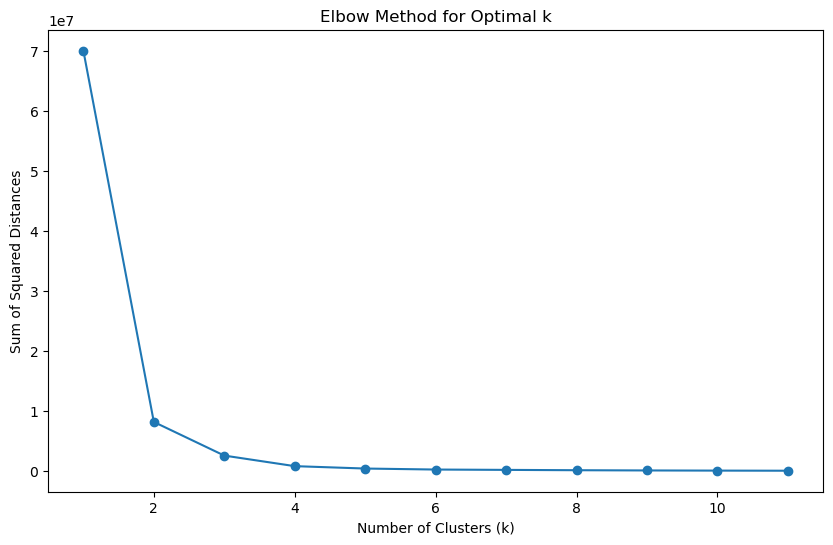

In [16]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the sum of squared distances for each k
sum_of_squared_distances = []

# Fit the KMeans model for each value of k and calculate the sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_market_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, sum_of_squared_distances, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [17]:
# Create an empty list to store the inertia values

inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_market_data)
    inertia_values.append(kmeans.inertia_)


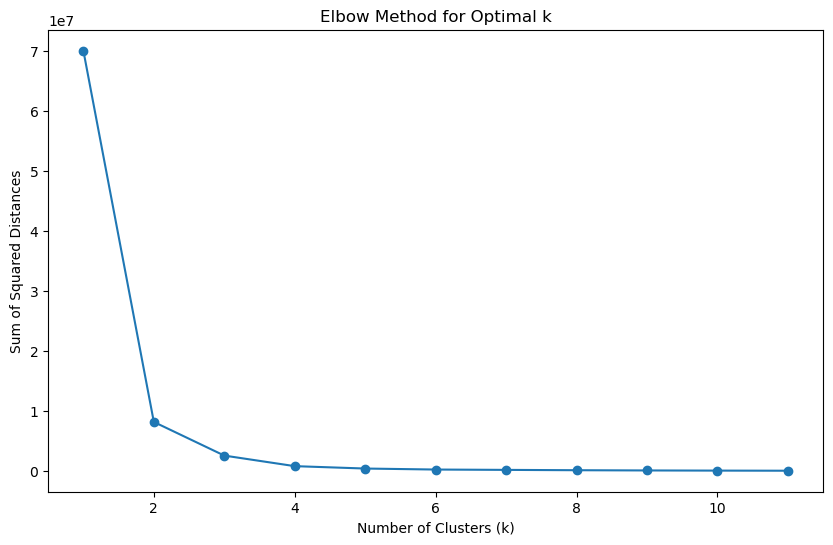

In [18]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_data["k_values"], elbow_data["inertia_values"], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

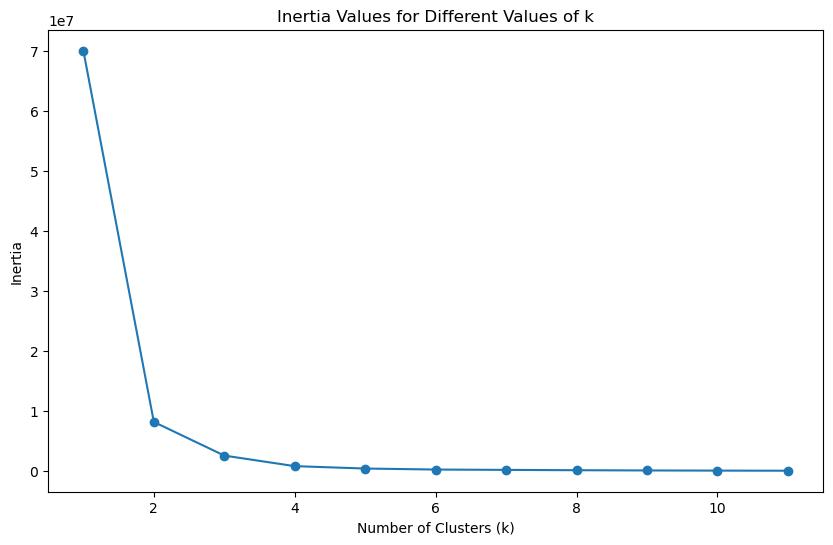

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia Values for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 2

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [20]:
# Initialize the K-Means model using the best value for k

# Assuming optimal_k is the best value for k
optimal_k = 2

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to your scaled data
kmeans_model.fit(df_market_data)


KMeans(n_clusters=2, n_init=10, random_state=42)

In [22]:
# Fit the K-Means model using the scaled data
cluster_assignments = kmeans_model.labels_

df_scaled_data['cluster'] = cluster_assignments

df_scaled_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df_scaled_copy = df_scaled_data.copy()

df_scaled_copy.drop('cluster', axis=1, inplace=True)

# Predict the clusters using the scaled data
predicted_clusters = kmeans_model.predict(df_scaled_copy)

# Add the cluster assignments to the original DataFrame
df_scaled_data['cluster'] = predicted_clusters

# Display the DataFrame with cluster assignments
df_scaled_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [28]:
# Create a copy of the DataFrame
df_copy = df_scaled_data.copy()


In [29]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_data['predicted_cluster'] = predicted_clusters

# Display sample data
df_scaled_data.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,predicted_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1,1


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


---

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)


In [31]:
# Use the PCA model with `fit_transform` to reduce to three principal components
pca_result = pca_model.fit_transform(df_scaled_data)

df_pca_result = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_data.index)

df_with_pca = pd.concat([df_scaled_data, df_pca_result], axis=1)

# View the first five rows of the DataFrame
df_with_pca.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,predicted_cluster,PC1,PC2,PC3
coin_id,,,,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1,1,-0.551954,0.883206,0.458427
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1,1,-0.443883,0.488613,0.950241
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1,-0.450361,-0.135920,-0.644774
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1,-0.492792,-0.187403,-0.483401
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1,1,-1.022995,2.118962,1.850218


In [34]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

for i, var in enumerate(explained_variance, 1):
    print(f'Explained Variance for PC{i}: {var:.4f}')
    
cumulative_explained_variance = explained_variance.cumsum()

for i, var in enumerate(cumulative_explained_variance, 1):
    print(f'Cumulative Explained Variance for the first {i} PCs: {var:.4f}')



Explained Variance for PC1: 0.3808
Explained Variance for PC2: 0.3408
Explained Variance for PC3: 0.1730
Cumulative Explained Variance for the first 1 PCs: 0.3808
Cumulative Explained Variance for the first 2 PCs: 0.7215
Cumulative Explained Variance for the first 3 PCs: 0.8946


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:*0.8946* 

In [36]:
# Creating a DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_data.index)

# Copy the crypto names from the original data
df_pca_data['crypto_name'] = df_scaled_data.index

# Set the 'coin_id' column as the index
df_pca_data.set_index('crypto_name', inplace=True)

# Display sample data
df_pca_data.head()



,PC1,PC2,PC3
crypto_name,,,
bitcoin,-0.551954,0.883206,0.458427
ethereum,-0.443883,0.488613,0.950241
tether,-0.450361,-0.135920,-0.644774
ripple,-0.492792,-0.187403,-0.483401
bitcoin-cash,-1.022995,2.118962,1.850218


---

### Find the Best Value for k Using the PCA Data

In [37]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [38]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans_model_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    kmeans_model_pca.fit(df_pca_data)
    
    inertia_values_pca.append(kmeans_model_pca.inertia_)


In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_values": k_values, "inertia_values": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()



,k_values,inertia_values
0,1,261.714662
1,2,165.250613
2,3,95.021226
3,4,50.894220
4,5,38.317820


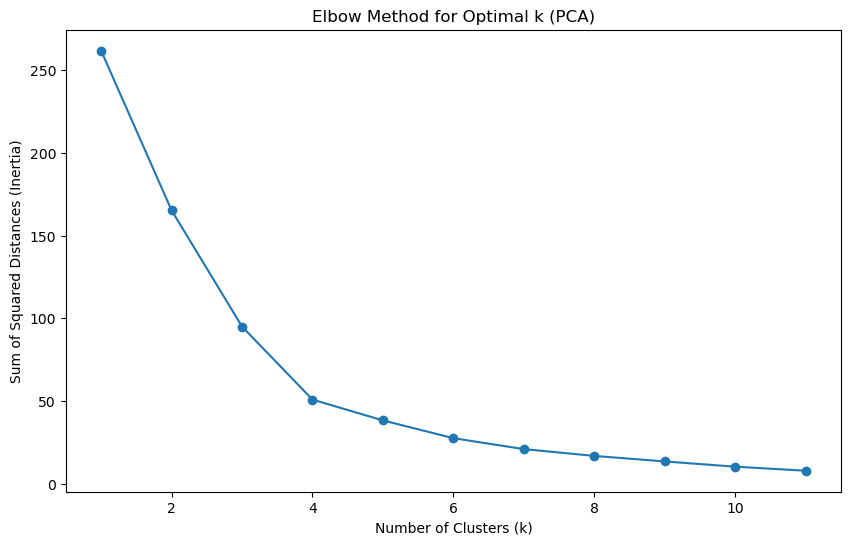

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca["k_values"], df_elbow_pca["inertia_values"], marker='o')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:*4*


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:*yes* 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
optimal_k_pca = 4

# Initialize the K-Means model with the best value for k
kmeans_model_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)

In [42]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca_data)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [43]:
# Predict the clusters using the PCA data
predicted_clusters_pca = kmeans_model_pca.predict(df_pca_data)

# Print the resulting array of cluster values
print(predicted_clusters_pca)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [44]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = predicted_clusters_pca

# Display sample data
df_pca_copy.head()



,PC1,PC2,PC3,predicted_cluster
crypto_name,,,,
bitcoin,-0.551954,0.883206,0.458427,0
ethereum,-0.443883,0.488613,0.950241,0
tether,-0.450361,-0.135920,-0.644774,2
ripple,-0.492792,-0.187403,-0.483401,2
bitcoin-cash,-1.022995,2.118962,1.850218,0


In [45]:
# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",
    cmap="viridis",  # You can choose a different colormap if needed
    title="K-Means Clustering (PCA)",
    hover_cols=["crypto_name"]
)

# Show the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [48]:
# Composite plot to contrast the Elbow curves


In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 